In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Salary_dataset.csv


# **Linear Regression**
Regression is used to find real values.

It gives a general formula for the dataset.

In this we calculate how much the difference in between the predicted value and the actual value for the whole dataset.

Difference between actual value and predicted value is called cost function.

Error is calculated for entire dataset using this cost function.

In [2]:
import matplotlib.pyplot as plt
# Importing Libraries

To read CSV file

In [3]:
#for numeric functions
import pandas as pd
# For importing algorithm
from sklearn.linear_model import LinearRegression
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing accuracy score and mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
# For plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA



Implementing Simple Linear Regression for salary dataset.

This dataset contains the years of experience and Salary of employees.

First column dosen't have any significance in data (Only used for Index).

We can remove that. To remove that we have two options

Method 1-By giving usecols arguments and only using required columns


In [4]:
data=pd.read_csv("/kaggle/input/dataset/Salary_dataset.csv",usecols=['YearsExperience','Salary'])
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Preprocessing

Splitting between Input and Output

In [5]:
X,Y=data['YearsExperience'].to_numpy().reshape(-1,1),data['Salary'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("Shape of Input data is:",X,"Shape of Output data is:",Y)

Input is:
 [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]

Output is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]
Shape of Input data is: [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]] Shape of Output data is: [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 6

Splitting into training and testing data.

we can do this directly as dataset is small instead of using train test split

In [6]:
x_train=X[:-5]
x_test=X[-5:]
y_train=Y[:-5]
y_test=Y[-5:]
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]
 [3. ]
 [3.1]
 [3.3]
 [3.3]
 [3.8]
 [4. ]
 [4.1]
 [4.1]
 [4.2]
 [4.6]
 [5. ]
 [5.2]
 [5.4]
 [6. ]
 [6.1]
 [6.9]
 [7.2]
 [8. ]
 [8.3]
 [8.8]]

Testing data is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]]
Shape of Training data is: (25, 1) Shape of Testing data is: (25, 1)


Now choose the Algorithm

In [7]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating the model

In [8]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))


Training Accuracy score is: 92.98889340527401
Predicted values are:

[[113773.84320812]
 [118768.07936621]
 [119766.92659783]
 [126758.85721916]
 [128756.55168239]]
Predicted value for 1.5 is:
 [[37861.45360513]]




print(accuracy_score(predict,y_test))-Doesn't work as accuracy score doesn't take array.

Checking for Error


In [9]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))


Mean Squared error is: 37525168.349489026
Mean Absolute error is: 5674.051614740977




# Plotting.

We can see the points are much away from the line.

Cost function is very high.

This is why absolute and mean squared error is so high.

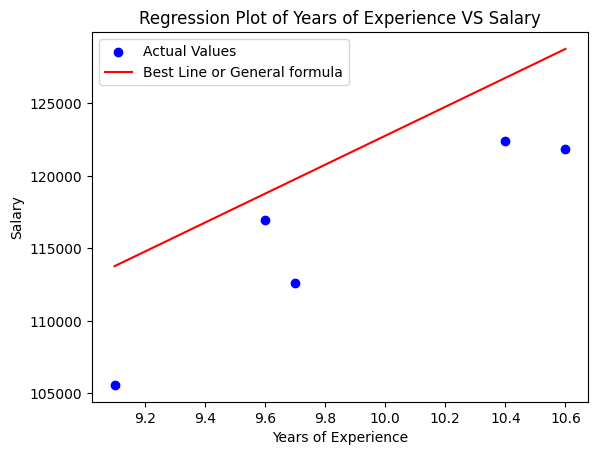

In [10]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.title("Regression Plot of Years of Experience VS Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(['Actual Values','Best Line or General formula'])
plt.show()



# Implementing Simple Linear Regression for housing dataset

Trying for USA housing dataset area population(input) and price(output).

Since we need only two columns we will only import this two.


In [13]:
df=pd.read_csv("//kaggle/input/usa-housing/USA_Housing.csv",usecols=['Area Population','Price'])
print("Dataset is:\n",df)
print("\nColumns are:\n",df.columns)
# Seeing dimension of column before reshaping
print("Dimension of Area Population column before reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column before reshaping to array is:",df['Price'].shape)


Dataset is:
       Area Population         Price
0        23086.800503  1.059034e+06
1        40173.072174  1.505891e+06
2        36882.159400  1.058988e+06
3        34310.242831  1.260617e+06
4        26354.109472  6.309435e+05
...               ...           ...
4995     22837.361035  1.060194e+06
4996     25616.115489  1.482618e+06
4997     33266.145490  1.030730e+06
4998     42625.620156  1.198657e+06
4999     46501.283803  1.298950e+06

[5000 rows x 2 columns]

Columns are:
 Index(['Area Population', 'Price'], dtype='object')
Dimension of Area Population column before reshaping to array is: (5000,)
Dimension of Price column before reshaping to array is: (5000,)


# Preprocessing Data
Splitting between Input and Output.

Columns are in dataframe ,thus they are in series format so we need to convert them to array and then also reshape them so that algorithm can use them.

In [14]:
X,Y=df['Area Population'].to_numpy().reshape(-1,1),df['Price'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
# Seeing dimension of column after reshaping
print("Shape of Input data(Area Population) is:",X.shape,"Shape of Output data(Price) is:",Y.shape)

Input is:
 [[23086.80050269]
 [40173.07217364]
 [36882.1593997 ]
 ...
 [33266.14548965]
 [42625.62015585]
 [46501.28380314]]

Output is:
 [[1059033.55787012]
 [1505890.91484695]
 [1058987.98787608]
 ...
 [1030729.58315229]
 [1198656.87240769]
 [1298950.48026696]]
Shape of Input data(Area Population) is: (5000, 1) Shape of Output data(Price) is: (5000, 1)


Splitting into training and testing data using train test split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[43108.01999029]
 [36337.98632219]
 [52969.63339687]
 ...
 [43717.91309194]
 [19502.0271442 ]
 [69553.98832716]]

Testing data is:
 [[1605398.57199998]
 [1048647.16555754]
 [1782803.86924212]
 ...
 [1415073.61418119]
 [1387864.88962707]
 [1726719.06674413]]
Shape of Training data is: (4000, 1) Shape of Testing data is: (4000, 1)


# Choose Algorithm

In [16]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

# Evaluating model

Since the dataset is very big and we are only using one column accuracy is less

In [20]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))

Training Accuracy score is: 16.987662338355435
Predicted values are:

[[1069791.46338882]
 [1520306.19538161]
 [1439179.42092992]
 [1381562.93561715]
 [1308341.87870817]
 [1089957.88387783]
 [ 989544.58730452]
 [1361405.59841606]
 [ 896218.28831158]
 [1165114.01690868]
 [1494684.98309091]
 [1058848.89891932]
 [1096939.87143903]
 [1049659.38023995]
 [1087285.40268296]
 [1027866.61622978]
 [1012829.86040589]
 [1392126.16649245]
 [1374249.9360119 ]
 [1174087.93126169]
 [1299561.27989667]
 [1163498.89580737]
 [1551615.09945838]
 [1190097.7401243 ]
 [1177184.73144406]
 [1272640.26358664]
 [1374118.25539217]
 [1248507.40216462]
 [ 949456.543524  ]
 [1532847.70300629]
 [1258480.96807844]
 [1481498.60768859]
 [1040410.74244234]
 [1238818.90698539]
 [1138019.31616073]
 [1444759.46260219]
 [1135772.43822625]
 [1091691.64156482]
 [1262339.18635954]
 [1200152.20764434]
 [ 964616.19991961]
 [ 908187.29156079]
 [1179372.74113494]
 [1308844.29873396]
 [1358388.32784197]
 [1391983.21865752]
 [ 877972.



print(accuracy_score(predict,y_test))-Doesn't work as accuracy score dosen't take array

Checking for Error

Error is more as accuracy is less


In [21]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))


Mean Squared error is: 110551815665.07321
Mean Absolute error is: 267443.19218598056


# Plotting

We can see the points are much away from the line.

Cost function is very high.

This is why absolute and mean squared error is so high.

Text(0, 0.5, 'Price')

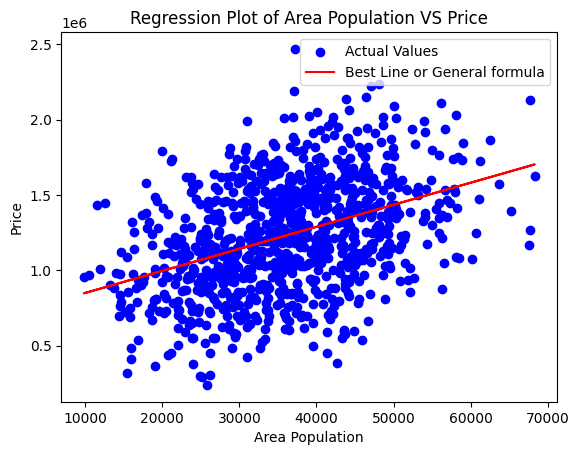

In [22]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.legend(['Actual Values','Best Line or General formula'])
plt.title("Regression Plot of Area Population VS Price")
plt.xlabel("Area Population")
plt.ylabel("Price")
# plt.show()

# Implementing Multiple Linear Regression for housing dataset

Trying for USA housing dataset

area population and all parameters(input) and price(output)

In [23]:
df=pd.read_csv("/kaggle/input/usa-housing/USA_Housing.csv")
print("Dataset is:\n",df)
print("\nColumns are:\n",df.columns)
# This column is not useful so we drop it
df=df.drop('Address',axis=1)
# Seeing dimension of column before reshaping
print("Dimension of Area Population column before reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column before reshaping to array is:",df['Price'].shape)

Dataset is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                            

Columns are in dataframe ,thus they are in series format so we need to convert them to array and then also reshape them so that algorithm can use them.

Function to reshape columns

In [24]:
func = lambda i:df[i].to_numpy().reshape(-1,1)
for i in df.columns:
    df[i]=func(i)
print("Dataset after reshaping is:\n",df)


Dataset after reshaping is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0             

Seeing dimension of column after reshaping of the dataset

In [25]:
print("Dimension of Area Population column after reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column after reshaping to array is:",df['Price'].shape)

Dimension of Area Population column after reshaping to array is: (5000,)
Dimension of Price column after reshaping to array is: (5000,)


# Preprocessing

Splitting between Input and Output

In [26]:
X,Y=df.drop('Price',axis=1),df['Price']
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("\nShape of Input data is:",X.shape,"Shape of Output data is:",Y.shape)

Input is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.8

Splitting into training and testing data using train test split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
636       54535.453719             5.278065                   6.871038   
1745      66234.680807             5.949312                   8.437666   
1848      73135.021608             5.816000                   6.329662   
2577      77502.474016             6.503287                   6.868717   
4432      70250.568754             6.406192                   8.106739   
...                ...                  ...                        ...   
2092      35608.986237             6.935839                   7.827589   
4103      74435.949938             3.533103                   6.144249   
4370      66490.833269             6.539362                   7.951157   
519       66295.081155             6.194392                   6.914309   
338       85707.078753             4.374148                   6.350157   

      Avg. Area Number of Bedrooms  Area Population  
636                           4.41    

# Choose Algorithm

In [28]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

# Evaluating model

Since the dataset is very big and we are using all columns accuracy increases

In [29]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)

Training Accuracy score is: 91.70385016363169
Predicted values are:

[1383424.17318557 1249986.932386   1442412.050578   1615332.44229781
 1357162.42214149 1820412.47712861 1473800.97011772 1276715.0652387
 1127283.1842112  1011928.89763121 1009566.9163669   929194.65056506
  993994.28548371 1536108.05872259 1611866.53765933 1519541.73190744
 1141436.18845564 1025757.65742081 1196050.85996647 1567207.40070229
  865455.77413189  579546.92024718 1123133.25167117 1759869.05533112
 1553173.37822582 1395080.45862858 1015453.92931922 1518416.08004057
  547258.09651653 1772178.16771813 1348876.66706351  659734.47872427
 1547813.49923303 1438731.00665264  833531.05612932 1295039.910753
 1169521.57378294 1359815.20440567 1327288.80257482 1456393.06261164
 1133618.17932684 1278190.59247538 1759271.05012898 1964769.93400415
 1160075.19076157  988209.28036259 1384915.46490145  845310.8344142
 1120979.37341865 1902101.04107943 1735514.34752596 1060745.0824306
 1574263.69035823  987505.25654994 1041

# Checking for Error

Error is less as accuracy is more

In [30]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))


Mean Squared error is: 10045037787.650747
Mean Absolute error is: 81364.83328907126




# Plotting graph for complete dataset

PCA (Principle component analysis)- For Dimension reduction of data.

As we cannot plot with multiple dimensions thus dimensions will be reduced to 2.


In [31]:
x=PCA(n_components=2)
# Transforming data
pca_data=x.fit_transform(X)
print("Transforming data\n",x.fit_transform(X))
print("\nShape of Transformed data is:\n",pca_data.shape)
print("\nTransformed Data is:\n",pca_data)

Transforming data
 [[-12355.34231389  11769.41434607]
 [-10150.51349937  -5176.60316217]
 [  7330.64748761    101.39871032]
 ...
 [  4836.0192449    3459.61287124]
 [  1300.45425077  -6356.57719758]
 [  4208.80933424  -9929.54125856]]

Shape of Transformed data is:
 (5000, 2)

Transformed Data is:
 [[-12355.34231389  11769.41434607]
 [-10150.51349937  -5176.60316217]
 [  7330.64748761    101.39871032]
 ...
 [  4836.0192449    3459.61287124]
 [  1300.45425077  -6356.57719758]
 [  4208.80933424  -9929.54125856]]


# Transform Test Data

In [32]:
x=PCA(n_components=2)
pca_data_2 = x.fit_transform(x_test)
print("Transforming data\n",x.fit_transform(x_test))
print("\nShape of Transformed data is:\n",pca_data_2.shape)
print("\nTransformed Data is:\n",pca_data_2)

Transforming data
 [[  4681.97719725   5127.50708233]
 [ 14720.19174727 -25651.25730581]
 [ -2178.40274921   -761.48545528]
 ...
 [  4282.53618409   8245.60485037]
 [ -2977.75025634  24391.0269895 ]
 [-25219.91092275 -11916.351361  ]]

Shape of Transformed data is:
 (1000, 2)

Transformed Data is:
 [[  4681.97719725   5127.50708233]
 [ 14720.19174727 -25651.25730581]
 [ -2178.40274921   -761.48545528]
 ...
 [  4282.53618409   8245.60485037]
 [ -2977.75025634  24391.0269895 ]
 [-25219.91092275 -11916.351361  ]]


# Plotting

We can see the points are closer to line.

Cost function is very low.

This is why absolute and mean squared error is low.

Since we have multiple Independent Variable, the graph contains multiple regression linesylabelylabel.

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

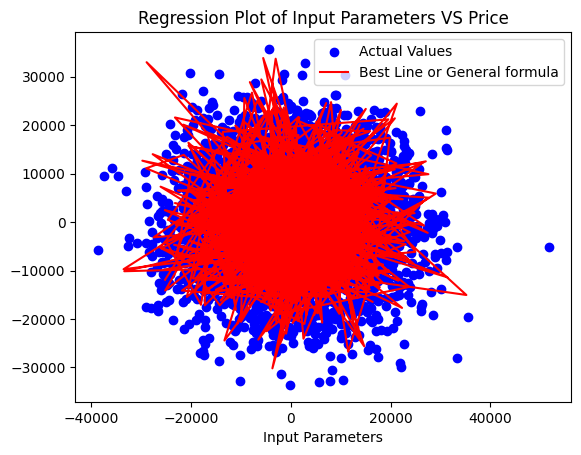

In [33]:
plt.scatter(pca_data[:,0],pca_data[:,1],color="blue")
plt.plot(pca_data_2[:,0],pca_data_2[:,1],color="red")
plt.legend(['Actual Values','Best Line or General formula'])
plt.title("Regression Plot of Input Parameters VS Price")
plt.xlabel("Input Parameters")
plt.ylabel